In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_qbr_salary_17-18')

In [3]:
qbs.dtypes

NAME         object
QBR         float64
QBR_rank    float64
salary        int64
dtype: object

In [4]:
qbs.head()

,NAME,QBR,QBR_rank,salary
0,Drew Brees,104.0,1.0,24250000
1,Tom Brady,102.6,2.0,20500000
2,Carson Wentz,101.9,3.0,6669085
3,Matthew Stafford,101.8,4.0,27000000
4,Alex Smith,99.0,5.0,17000000


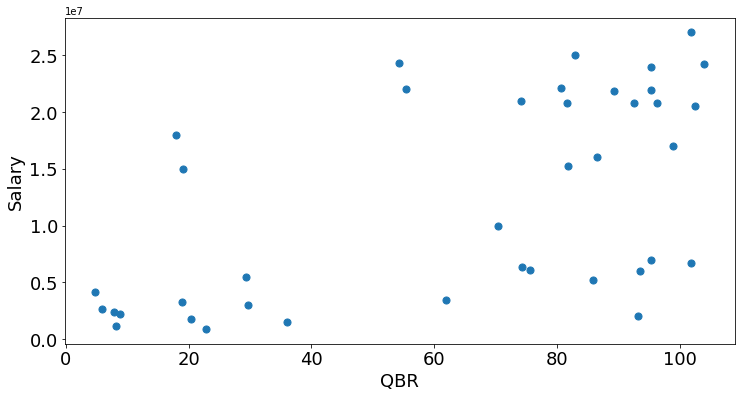

In [5]:
ax = qbs.plot(kind="scatter", x = 'QBR',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('QBR', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['QBR', 'salary']])

In [7]:
X.mean(axis = 0)

array([-5.01023724e-16, -1.99270799e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[ 0.84711206,  1.00601239],
       [-1.31930379, -1.08862836],
       [ 0.59843045, -0.7211662 ],
       [-0.04935841,  1.14365188],
       [-1.29251299,  0.47513933]])

In [11]:
km.predict(X)

array([0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 3,
       2, 2, 3, 3, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1], dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,QBR,QBR_rank,salary,clusters
0,Drew Brees,104.0,1.0,24250000,0
1,Tom Brady,102.6,2.0,20500000,0
2,Carson Wentz,101.9,3.0,6669085,2
3,Matthew Stafford,101.8,4.0,27000000,0
4,Alex Smith,99.0,5.0,17000000,0


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[9.21428571e+01, 2.12249595e+07],
       [1.75272727e+01, 2.58191009e+06],
       [8.35777778e+01, 5.85245433e+06],
       [6.12666667e+01, 2.24500000e+07],
       [1.84500000e+01, 1.65000000e+07]])

In [14]:
qbs.groupby('clusters')[['QBR', 'salary']].mean()

,QBR,salary
clusters,,
0,92.142857,2.122496e+07
1,17.527273,2.581910e+06
2,83.577778,5.852454e+06
3,61.266667,2.245000e+07
4,18.450000,1.650000e+07


In [15]:
centroids = qbs.groupby('clusters')[['QBR', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

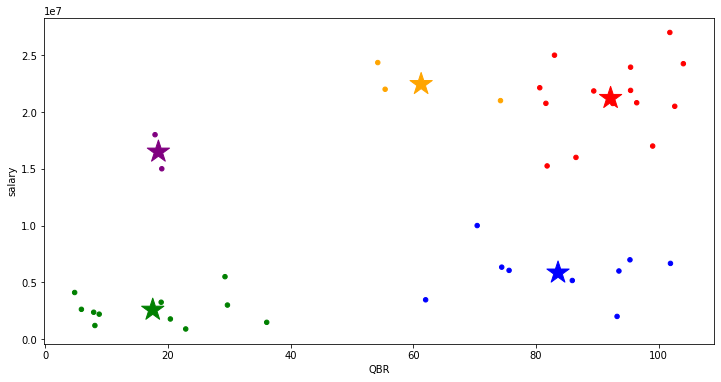

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'QBR', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'QBR', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

5.974727924050114

In [18]:
silhouette_score(X, km.labels_)

0.561238435266635